## Start running flowacc / chi calc on all basin

In [7]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
eros1 = [None]*3600
eros2 = np.zeros(3600)
slpsall = np.zeros(3600)
slps2 = np.zeros(3600)
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [7]:
nr = 100
Gs = np.zeros(nr) + np.random.rand(nr)*10.0
ks = np.zeros(nr) + 1e-8#np.power(10.0,np.random.rand(nr)*-8+-5)
ns = np.random.rand(nr) *0.0 + 1.0 #np.zeros(nr)+2.7#
ms = ns * .5#np.random.rand(nr)*.5+.1 #np.zeros(nr)+1.0
#concavity = np.random.rand(nr)*.6+.1
diffus =0*ks * np.power(10.0,np.random.rand(nr)*12+5)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3)*0+12
#dn = np.random.rand(nr) + 1.0
dn = np.zeros(nr) + 1.0

In [47]:
nr = 20
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 1e-8#np.power(10.0,np.random.rand(nr)*-8+-5)
ns = np.linspace(.2,4,20)#np.random.rand(nr) * 4.0 #np.zeros(nr)+2.7#
ms = ns * .4#np.random.rand(nr)*.5+.1 #np.zeros(nr)+1.0
#concavity = np.random.rand(nr)*.6+.1
diffus =np.zeros(nr)+.0#ks * np.power(10.0,np.random.rand(nr)*20)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3)*0+12
dn = np.linspace(.1,4,nr) / np.linspace(.1,4,nr)

In [48]:
nr = 1000
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 1e-8# np.power(10.0,np.linspace(-10,-3,nr))
ns = np.zeros(nr) +4
ns = np.array(np.linspace(.2,4,nr)).ravel() #np.zeros(nr)+2.7#
ms = ns * .5#s for s in [.1, .2, .3, .35, .4, .45, .5, .55, .6, .7]]).ravel()  #np.zeros(nr)+1.0
concavity = np.zeros(nr)+.5#np.random.rand(nr)*.6+.1
diffus = 0*ks* np.power(10.0,np.random.rand(nr)*10-1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.zeros(nr)+12#np.zeros(nr)+12#np.power(10.0,np.random.rand(nr)*3)*5

In [30]:
nr = 6
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 0*1e-8# np.power(10.0,np.linspace(-10,-3,nr))
ns = np.array(np.linspace(.2,4,nr)).ravel() #np.zeros(nr)+2.7#
ms = ns * .5#s for s in [.1, .2, .3, .35, .4, .45, .5, .55, .6, .7]]).ravel()  #np.zeros(nr)+1.0
concavity = np.zeros(nr)+.5#np.random.rand(nr)*.6+.1
diffus = np.zeros(nr)+.01#*ks* np.power(10.0,np.random.rand(nr)*10-1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3.69) 
dn = np.linspace(.333,2.0,6)

In [31]:
# Use f from n = 4 in standard run below


# f.sinkfill()
# f.slp_basin()
# f.stack()
# f.acc()

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
jet = cm.get_cmap('jet', 64)
l = ListedColormap(jet(range(10,55)))

In [45]:
dem.bounds

BoundingBox(left=14.529999999993606, bottom=-22.941666666663345, right=17.590833333326817, top=-21.365833333330073)

In [82]:
rivs = a['geometry'][0]
xs = []
ys=[]
for i in range(len(rivs.exterior.coords.xy[0])):
    xs.append(rivs.exterior.coords[i][0])
    ys.append(rivs.exterior.coords[i][1])
xbound = xs
ybound = ys

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_68018/764521966.py:67: SyntaxWarning: Short-form parameter (t) is not recommended. Use long-form parameter 'transparency' instead.
  fig.grdimage(


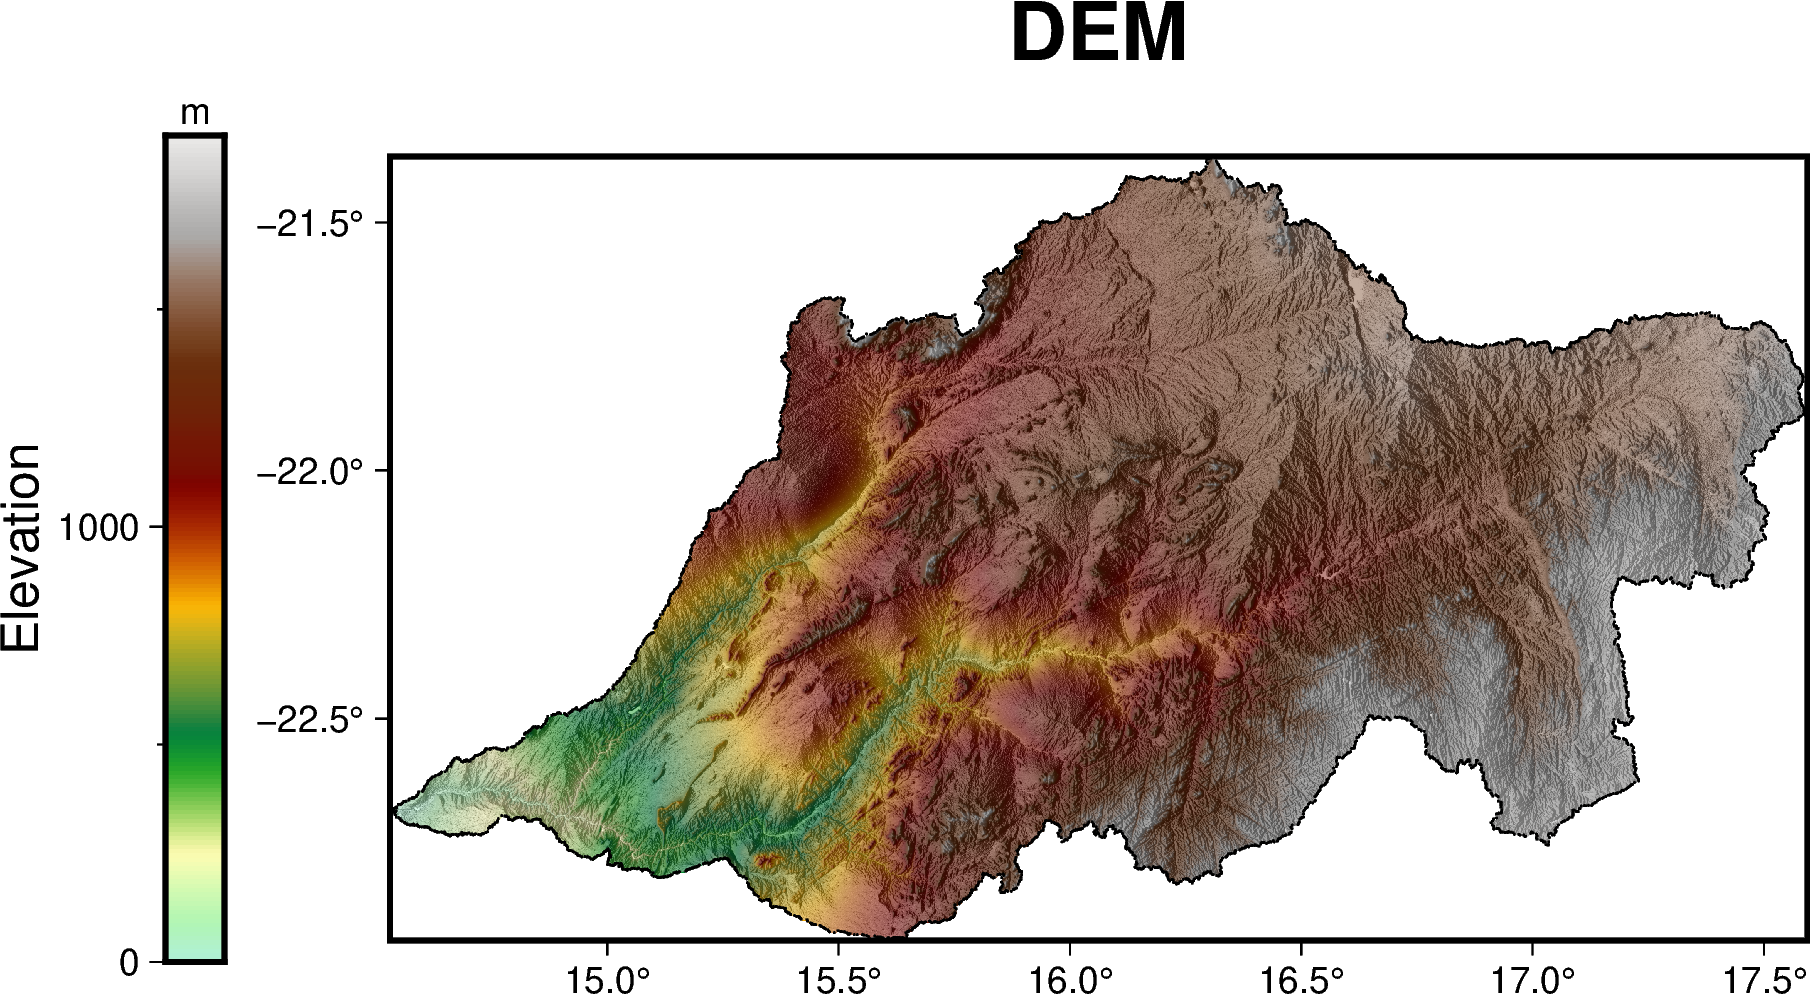

In [110]:
from skimage import filters
# T[T<=0] = .000000000000000000001
# plt.figure(figsize=(10,5))
# plt.imshow((T),vmin=0,vmax=(q),cmap=l)
# plt.xticks([])
# plt.yticks([])
# cbar = plt.colorbar(extend='max')
# cbar.ax.tick_params(labelsize=24)
# plt.savefig('../../tmpfig',dpi=300)


z = f.Z.copy()
z[f.Z == 0] = np.nan
geom = a[3:4]
import pygmt
import xarray as xr

ny,nx = np.shape(z)
lon = np.zeros(nx)
lat = np.zeros(ny)
for i in range(nx):
    lon[i], _ = dem.xy(0, i)
for i in range(ny):
    _, lat[i] = dem.xy(i, 0)
        

# Define region of interest around Yosemite valley
region = [dem.bounds[0], dem.bounds[2], dem.bounds[1], dem.bounds[3]]

fig = pygmt.Figure()

# Load sample grid (3 arc second global relief) in target area
da = xr.DataArray(z, coords=[('latitude', lat,
                                       {'units': 'degrees_north'}),
                                       ('longitude', lon,
                                       {'units': 'degrees_east'})], 
                         attrs = {'actual_range': [-1, 1]}
                 )

dataset = da.to_dataset(name='dataarray')


# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=dataset.dataarray, radiance=[270, 30])

# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

# --------------- plotting the original Data Elevation Model -----------
pygmt.makecpt(cmap="dem4", series=[0, 1900, 10])
fig.grdimage(
    grid=pygmt.grdclip(dataset.dataarray,between=[3000,20000001,"NaN"]),
    projection="M12c",
    frame=['WSrt+t"DEM"', "xa0.5", "ya0.5"],
    nan_transparent=100,
    cmap=True,
)

fig.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa1000f500+lElevation", "y+lm"])

# --------------- plotting the hillshade map -----------

# Shift plot origin of the second map by 12.5 cm in x direction

#pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    cmap="gray",
    t=50,
    nan_transparent=100
)
fig.plot(data = geom, style="c0.02c",color='black')
fig.show()


####

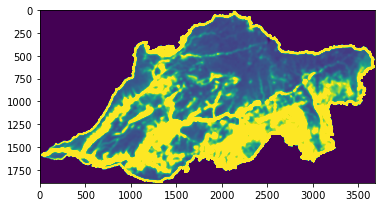

In [190]:

    plt.imshow(T,vmax=1000)

In [185]:
I

(array([   0,    0,    0, ..., 1894, 1894, 1894]),
 array([   0,    1,    2, ..., 3674, 3675, 3676]))

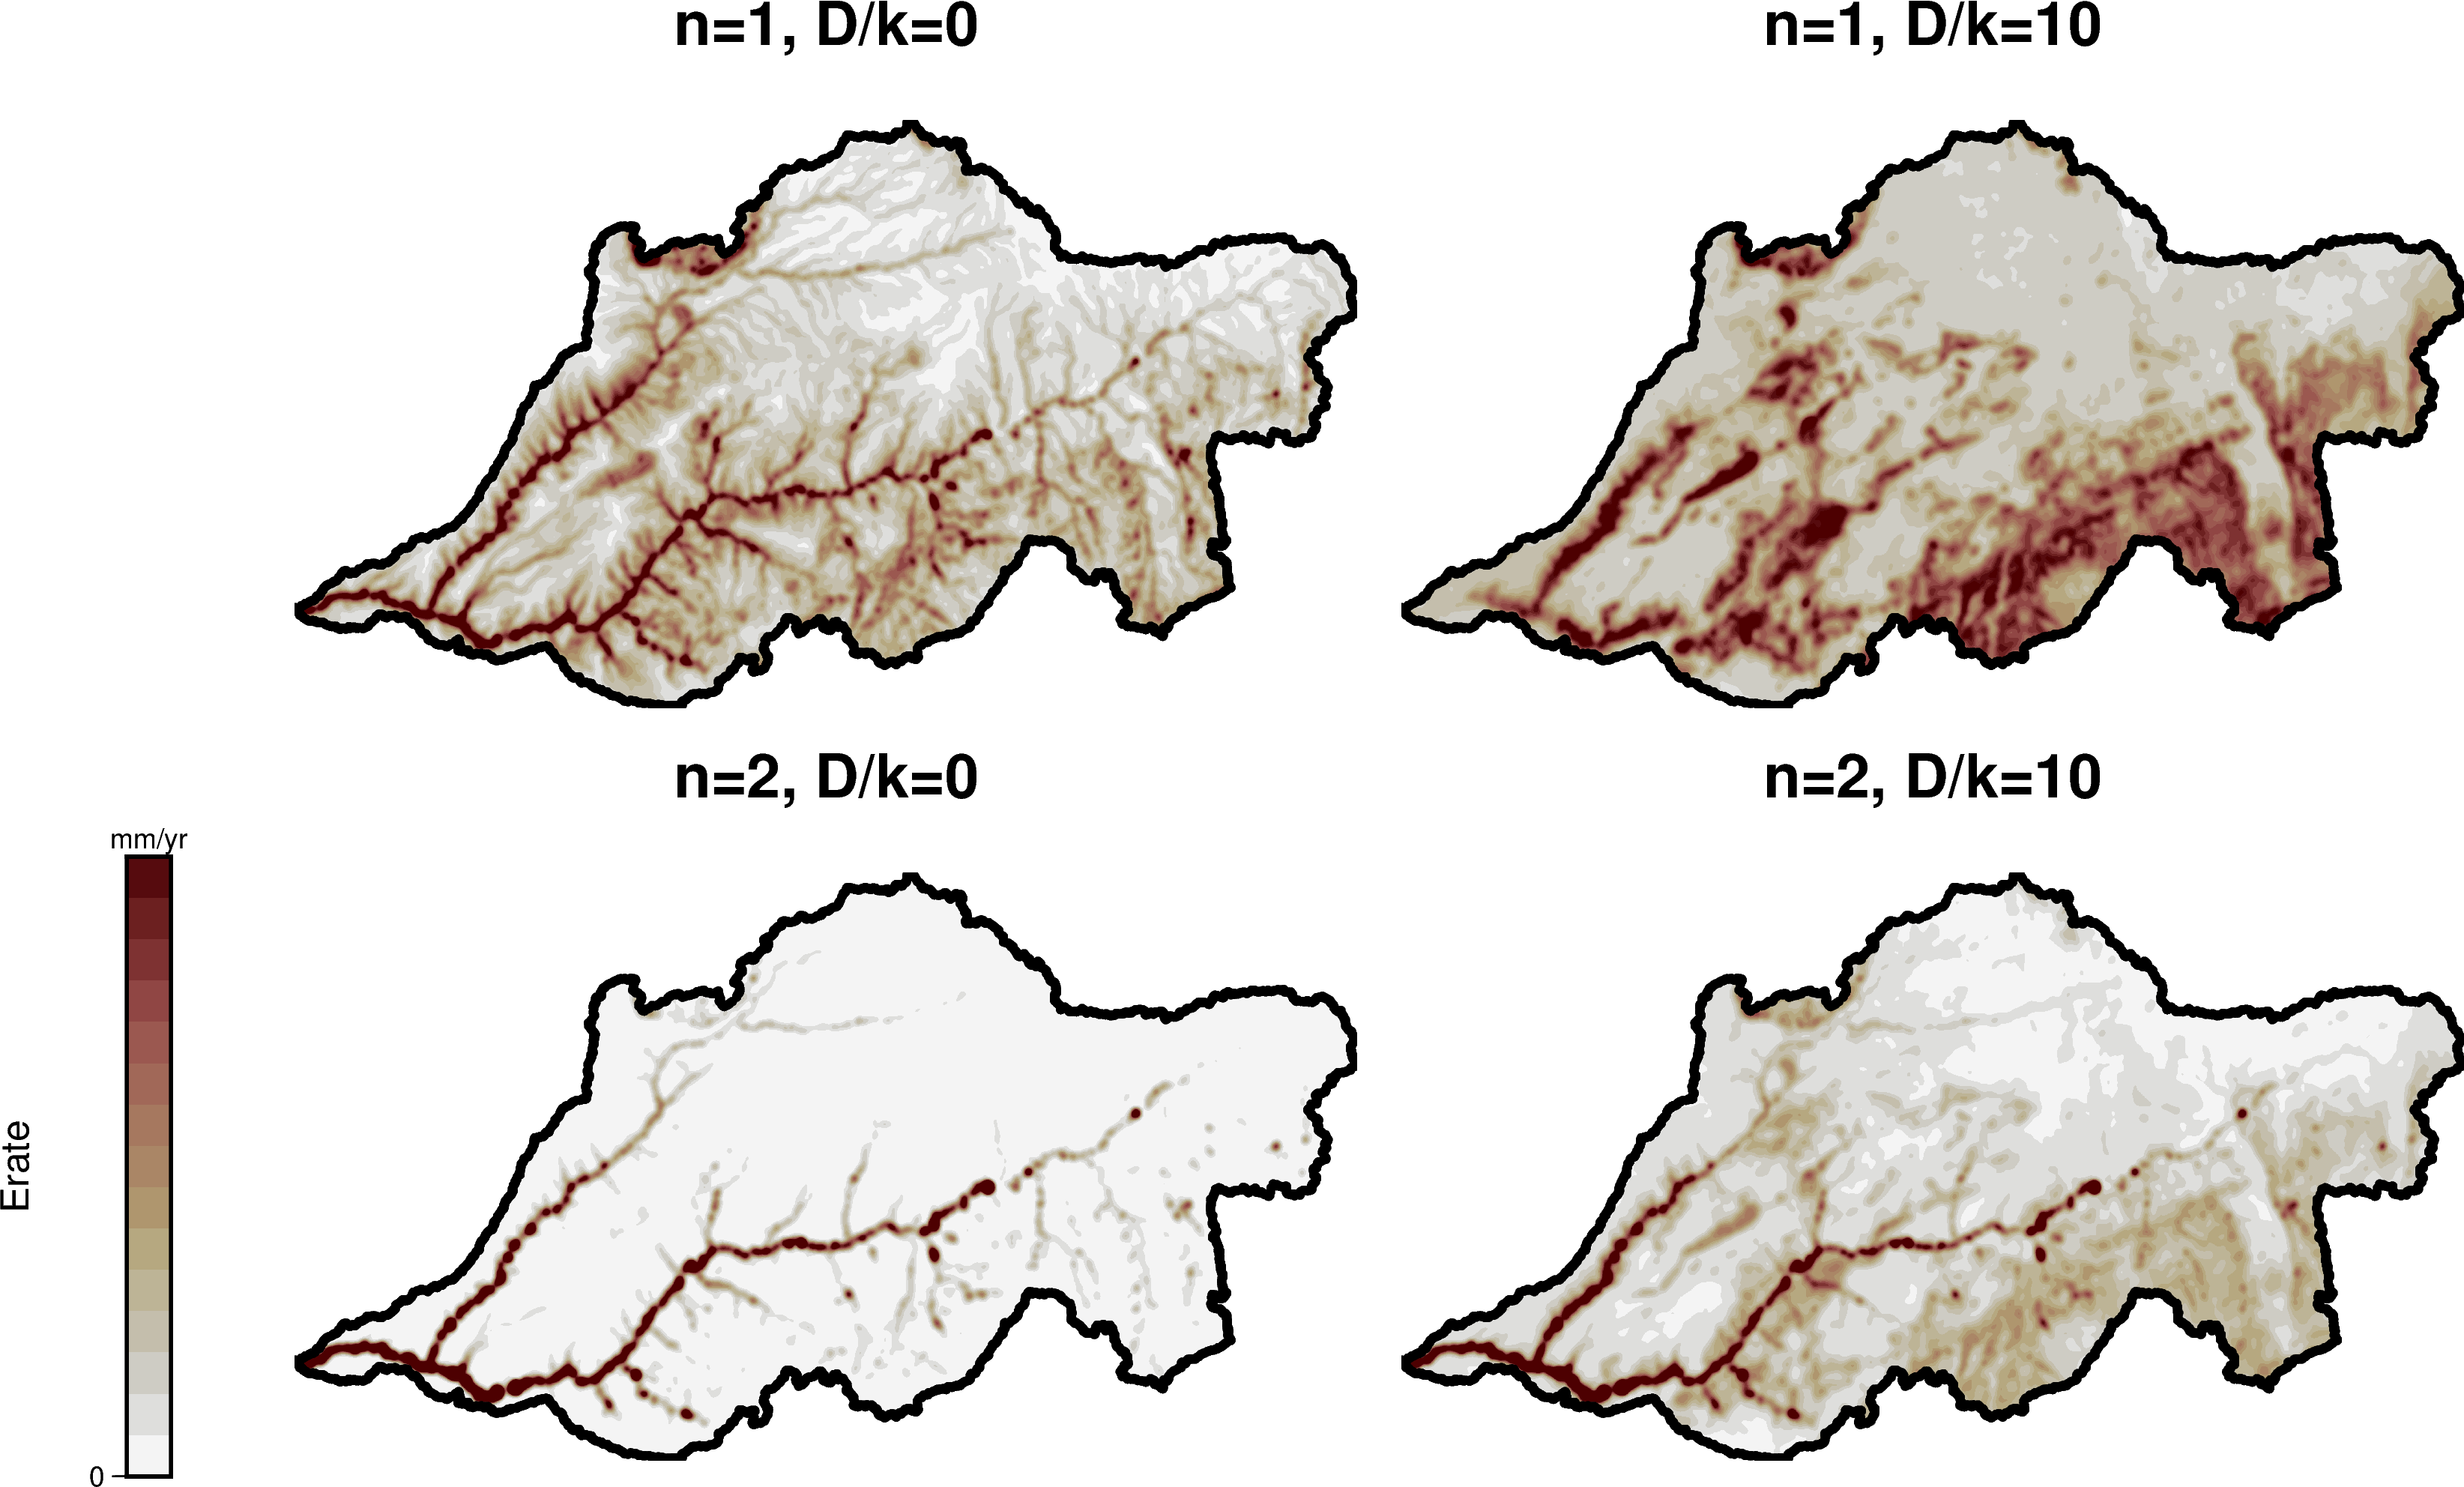

In [204]:

def gmteroplot(D,n):
    ny,nx = np.shape(z)

    F = simplem.erode_other_2(0, ny, nx ,f.I, f.s, 90.0, 90.0, n/2, n, np.zeros((ny,nx))+1e-8, f.slps,1000.00, f.A,np.zeros((ny,nx)), 12.0)
    Ed = simplem.diffuse(-D, f.Z, 90, 90,1000)
    Ed[Ed<0] = 0
    E = T = Ed+F
    L = F# np.divide(F,np.max(T.ravel()))
    R = Ed#np.divide(Ed,np.max(T.ravel()))
    T = L + R
    T*=1e4
    
    I = np.where(np.isnan(z))
    I[0][I[0]>ny-2] = ny-2
    I[1][I[1]>nx-2] = nx-2
    T[I[0]+1,I[1]+1]= 0 
    T[I[0]-1,I[1]-1] = 0
    T[I[0]-1,I[1]+1]= 0 
    T[I[0]+1,I[1]-1]= 0 
    T[I[0]+1,I[1]]= 0 
    T[I[0]-1,I[1]]= 0 
    T[I[0],I[1]+1]= 0 
    T[I[0],I[1]-1]= 0 

    T = filters.gaussian(T, sigma=(10,10), truncate=20, multichannel=True)
    T[np.isnan(z)] = np.nan

    q = np.quantile(T[T>0],.98)
    pygmt.makecpt(cmap="bilbao", series=[0, q, q/15], truncate="0/1")
    
    da = xr.DataArray(T, coords=[('latitude', lat,
                                       {'units': 'degrees_north'}),
                                       ('longitude', lon,
                                       {'units': 'degrees_east'})], 
                         attrs = {'actual_range': [-1, 1]}
                 )

    dataset = da.to_dataset(name='dataarray')
    if D>0:
        dk ="10"
    else:
        dk = "0"
    fig.grdimage(
        grid=dataset.dataarray,
        projection="M12c",
        frame=['+t"n={}, D/k={}"'.format(str(n),dk)],
        nan_transparent=100,
        )
    fig.plot(data = geom, style="c0.1c",color='black')
    return T
fig.shift_origin(xshift="8.5c")

fig = pygmt.Figure()
T = gmteroplot(0,1)
fig.shift_origin(xshift="12.5c")
T = gmteroplot(.1,1)
fig.shift_origin(yshift="-8.5c")
T = gmteroplot(.1,2)
fig.shift_origin(xshift="-12.5c")
T = gmteroplot(.0,2)
fig.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa100000000f500000+lErate", "y+lmm/yr"])
fig.show()




In [201]:
1/1e-8 / 1e7

10.0

In [17]:
n=4
def do_ero(i):
    k1[k1>0] = ks[i]
    E = simplem.diffuse(-(diffus[i]**(1.0/1.0)),Zi,dy1,dx1,1)# change too 1/2 when running sqr
    
    #plt.imshow(Zi)
    #plt.show()
    E[E<0] = 0
    E=E**1.0
    m = ms[i]
    n = ns[i]
    #E[A1<careas[i]] = 0
    ero = simplem.erode_other_2(Gs[i],ny1,nx1,I1,s1,dx1,dy1,ms[i],ns[i],k1,slps1,dt1,A1,E,careas[i])
    A = simplem.acc(ero.copy(), ny1, nx1, I1, s1)
   # print(np.sort(A1.ravel()))
    pl =(A.ravel()[np.argmax(A1.ravel())])/np.max(A1.ravel())
    return pl, i
nfail = 0
for c in range(1,n,1):
    try:
        print(c)

        dem = rasterio.open('/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v2_{}.tif'.format(str(c)))
        lat = dem.xy(0,0)[1]
        dx = np.cos(lat/180*np.pi) * (1852/60) * 3
        f = simplem.fs()
        f.dx = dx
        f.dy = 92.59

        f.set_z(np.pad(np.float64(np.squeeze(dem.read())), pad_width=2))

        f.BC = np.where(f.Z.transpose().ravel()<=0)[0]

        f.slp_basin()
        slpx= f.slps.copy()

        f.k[:,:] = 1e-6
        f.k[f.Z == 0] = 0

        f.sinkfill()
        f.slp_basin()

        #f.slp_mn()
        slps = f.slps.copy()

        f.dt = 1000
        f.stack()
        f.acc()
        Zi = f.Z.copy()
        A1=f.A.copy()

        ero = f.erode_other()
        #f.slp_mn()

       # slps[slps>1]= 0
        #f.slp()
        mnmat = np.zeros((len(ms),1))
        if 1:
            k1 = f.k.copy()

            A1 = f.A.copy()
            ny1 = f.ny
            nx1 = f.nx
            I1 = f.I.copy()
            slps1 = f.slps.copy()
            s1 = f.s
            dt1 = f.dt
            dy1 =f.dy
            dx1 = f.dx
            with mp.Pool(6) as p:
                vals = p.map(do_ero,[i for i in range(len(ns))])

        eros1[c] = mnmat[ list(zip(*vals))[1],0] =  list(zip(*vals))[0]
        #fig,ax = plt.subplots(figsize=(5,5))
        #plt.imshow(vals[0][2])
        #eros1[c] = (f.A.ravel()[f.Z.ravel()>0][np.argmax(A.ravel()[f.Z.ravel() > 0])])/np.max(A.ravel()[f.Z.ravel()>0])
        #A2 = simplem.acc(slpx, ny1,nx1,I1,s1)
        #slpsall[c] = (A2.ravel()[np.argmax(A1.ravel())])/np.max(A1.ravel())

        #slps1[c] = np.mean(np.logical_and(slps[f.Z>0]))

      #  f.slp_mn()

       # slps = f.slps.copy()
      #  f.slp()
       # slps[slps>1] = 0
        f.acc(slps)
        slps2[c] = (f.A.ravel()[f.Z.ravel()>0][np.argmax(A1.ravel()[f.Z.ravel() > 0])])/np.max(A1.ravel()[f.Z.ravel()>0])

       # print(np.mean(f.slps.ravel()[A.ravel()>1]))
       # print(f.A.ravel()[np.argmax(A.ravel())]/np.max(A.ravel()))
        #print(np.sum(slps.ravel()[np.logical_and(f.Z.ravel()>1,f.slps.ravel()<1)]))
       # print(max(f.A.ravel()))#[np.argmax(A.ravel())])
    
    except Exception as e:
        print('fail' + str(c))
        print(e)
       # po=1
       # nfail+=1
                      

1
193791
164886
fail1
name 'ms' is not defined
2
114444
106652
fail2
name 'ms' is not defined
3
3481530
3258791
fail3
name 'ms' is not defined


In [58]:
d=simplem.diffuse(.01, f.Z, 90, 75, 1000)
np.mean(d[d>0])

0.032923536343182645

In [116]:
slps.ravel()[np.argmax(vals[0][2].ravel())]

0.41869696779154963

(0.001, 1.0)

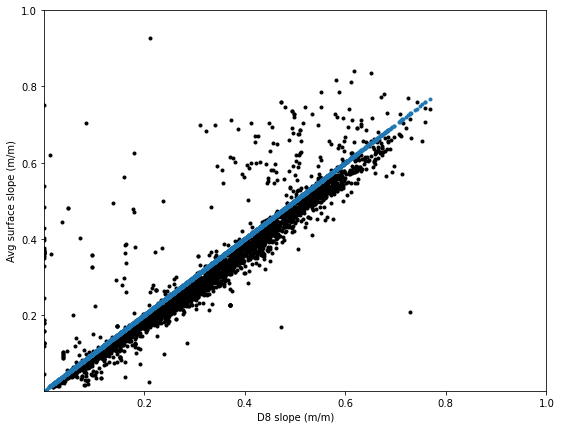

In [21]:
fig,ax = plt.subplots(figsize=(9,7))

plt.plot(slps2[:len(a)],a['slp_ave']/1000,'k.')
plt.plot(slps2,slps2,'.')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('D8 slope (m/m)')
plt.ylabel('Avg surface slope (m/m)')
plt.xlim([10**-3, 10**0])
plt.ylim([10**-3, 10**0])

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))
plt.plot(slpsall[:len(a)],a['ebe_mmkyr']/1000,'k.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 slope (m/m)')
plt.ylabel('Observed erosion rate (mm/kyr)')

In [ ]:
plt.plot(np.log10(ks2),r2s,'.')
ro = np.where(r2s>.01)[0][5]
plt.plot(dfs[ro][:len(a)],a['ebe_mmkyr'], '.')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'count')

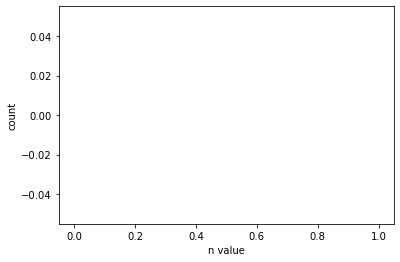

In [185]:
plt.hist(np.log10(diffus[r2s<3.4]))
plt.xlabel('n value')
plt.ylabel('count')

In [27]:
plt.plot(dfs[np.argmax(r2s)],a['ebe_mmkyr'],'.')

NameError: name 'dfs' is not defined

In [10]:
plt.plot((ns),r2s,'.')
ns[np.argmax(r2s)]

NameError: name 'r2s' is not defined

In [ ]:
plt.plot((ns),r2s,'.')
ns[np.argmax(r2s)]

In [470]:
ls = gpd.read_file('/Users/gr_1/Downloads/River_basin_num2/River_basin_num2.shp')
#ls.Volume.sum()*1e2*2700/1e9

In [471]:
ls.to_file('/Users/gr_1/Downloads/river_bsn')

In [472]:
len(np.where(a['ebe_mmkyr'] ==0)[0])

0

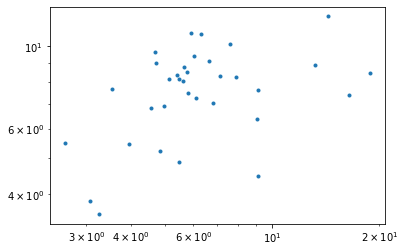

In [15]:
plt.plot(dfs[4][:35],a['ebe_mmkyr'][:35],'.')
plt.xscale('log')
plt.yscale('log')

In [81]:
dfs[1][:37]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
#plt.plot(dfs[10,0],a['ebe_mmkyr'],'.')
#plt.xscale('log')
#plt.yscale('log')
#np.save('ers_diffu+sp',eros1)
#a= plt.plot(ks,r2s[:,0],'.')
#plt.xscale('log')
#plt.hist(concavities)
plt.plot(diffus[r2s>.15]),bins=10)


In [35]:
folder = 'results/r_g_nodiffusion'
if 1:
    np.save('{}/eros'.format(folder),eros1)
    np.save('{}/diffu'.format(folder),diffus)
    np.save('{}/ms'.format(folder),ms)
    np.save('{}/ns'.format(folder),ns)
    np.save('{}/ks'.format(folder),ks)
    np.save('{}/careas'.format(folder),careas)
    np.save('{}/Gs'.format(folder),Gs)
    np.save('{}/careas'.format(folder),careas)
    np.save('{}/slps2'.format(folder),slps2)
    np.save('{}/dns'.format(folder),dn)
    

In [37]:
1

1

In [164]:
eros1 = np.load('r_sole/eros.npy',allow_pickle=True)

In [18]:
    np.save('{}/slps2'.format(folder),slps2)


In [222]:
#eros2 = np.load('eros_with_diffusion-var_hills.npy',allow_pickle=True)
folder = 'results/r_G_1'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

In [192]:
for i in range(1,len(eros1)):
    if eros1[i] is None:
        continue
    else:
        eros1[i] = np.concatenate([eros1[i],eros2[i]])

ValueError: x and y must have same first dimension, but have shapes (19, 41) and (3553,)

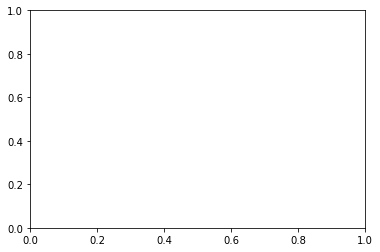

In [17]:
plt.plot(slpsa[:len(a)],a['slp_ave']/1000,'.')
plt.plot(np.arange(1e-2,1.0,1e-2),np.arange(1e-2,1.0,1e-2),'.')
plt.yscale('log')
plt.xscale('log')

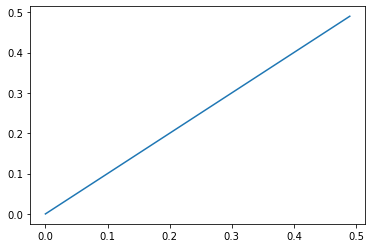

In [135]:
plt.plot(np.arange(0,.5,.01),np.arange(0,.5,.01))

In [8]:
np.a['slps1'] = slps1[:len(a)]

In [9]:
np.from sklearn import linear_model

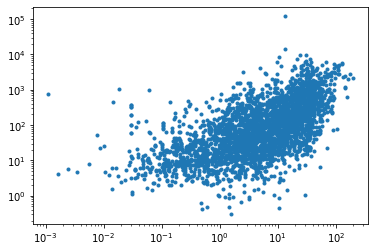

In [63]:
plt.plot(dfs[0][:len(a)], a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
eros1[1:]*=1000000

## Begin other thing

In [223]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
            

In [154]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
ks2 = ks.copy()
diffus2 = diffus.copy()
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>n-500:
                print(len(x[np.logical_not(np.isnan(x))]))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                y2 = p.predict(x.reshape(-1,1))
                y3 = x * p.coef_
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = np.mean(np.power(y-y3,2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p.coef_


NameError: name 'dfs' is not defined

Text(0, 0.5, 'r2')

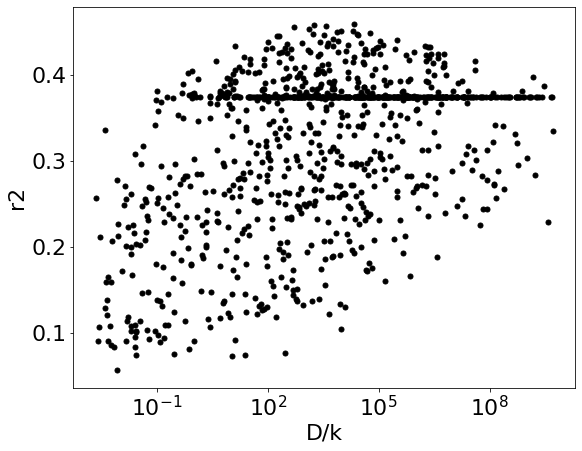

In [277]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((diffus/ks),r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('D/k')
plt.ylabel('r2')


Text(0, 0.5, 'r2')

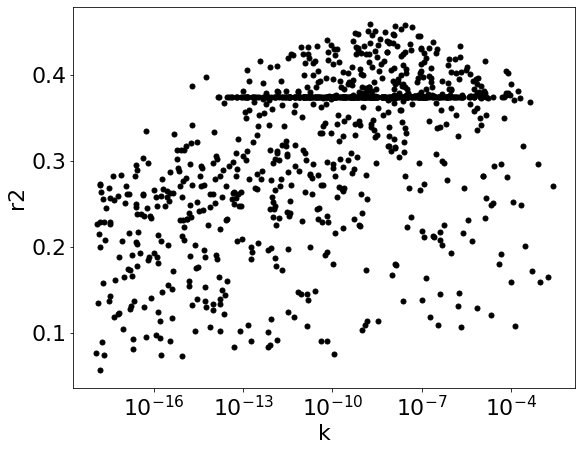

In [285]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((ks2),r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('r2')


Text(0, 0.5, 'run count')

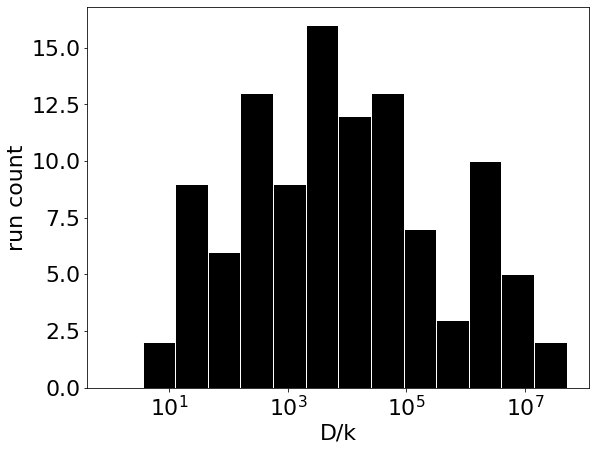

In [289]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist(np.divide(diffus[r2s>.4],ks[r2s>.4]),edgecolor='w',color='k',bins = np.power(10.0,np.arange(0,8,.55)))
plt.xscale('log')
plt.xlabel('D/k')
plt.ylabel('run count')

In [259]:
np.power(10,np.arange(-10,-4))

ValueError: Integers to negative integer powers are not allowed.

Text(0, 0.5, 'run count')

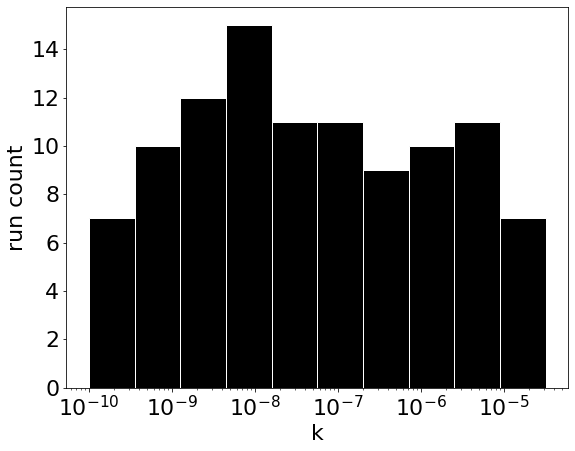

In [270]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist((ks[r2s>.4]),edgecolor='w',color='k',bins = np.power(10.0,np.arange(-10,-4,.55)))
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('run count')

Text(0, 0.5, 'r2')

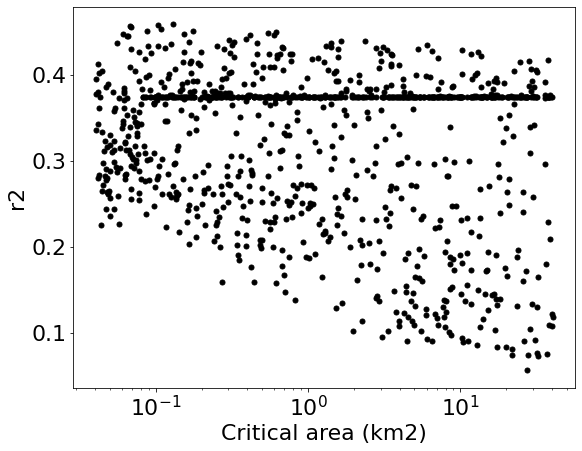

In [293]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((careas)*90**2/1e6,r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('Critical area (km2)')
plt.ylabel('r2')


Text(0, 0.5, 'run count')

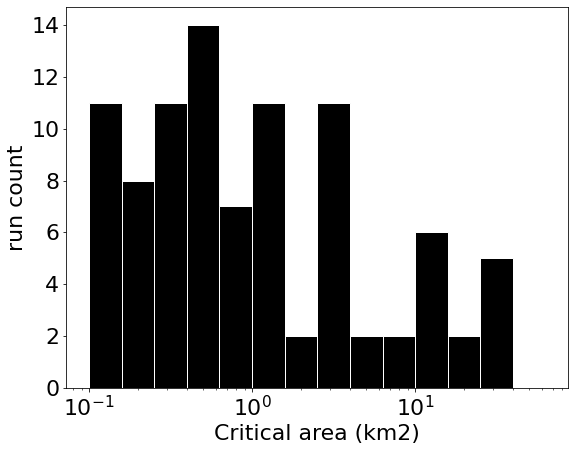

In [304]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist(careas[r2s>.4]*90**2/1e6,edgecolor='w',color='k',bins = np.power(10.0,np.arange(-1,2,.2)))
plt.xscale('log')
plt.xlabel('Critical area (km2)')
plt.ylabel('run count')

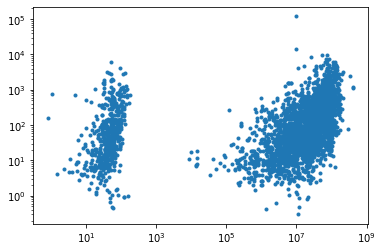

In [122]:
#plt.hist(plt.plot(diffus[r2s>.4]))
#plt.plot(dfs[np.argmax(r2s)][:len(a)],a['ebe_mmkyr'],'.')


In [15]:
ks

array([1.35171591e-05, 2.47521956e-04, 8.90428269e-08, 4.44249167e-06,
       3.04726137e-03, 1.07334156e-04, 1.22966890e-05, 7.73824977e-05,
       2.22489836e-09, 3.70245556e-03, 7.16858240e-07, 5.63449033e-08])

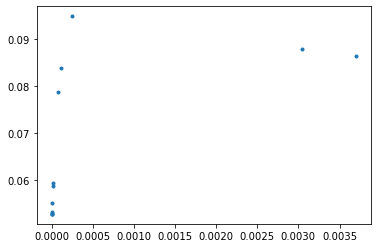

In [14]:
plt.plot(ks,r2s,'.')
#plt.xscale('log')
#plt.yscale('log')

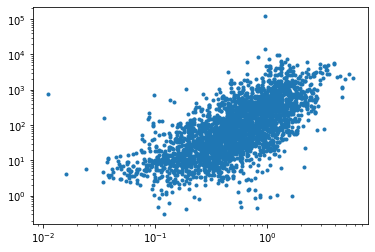

In [33]:
plt.plot(dfs[966][:len(a)],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [13]:
Gs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
np.argmin(np.abs(ns-1.9286))

126

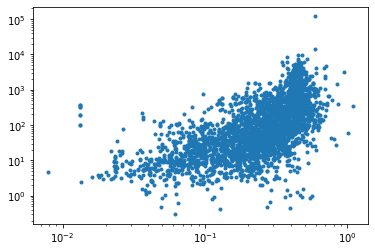

In [54]:
plt.plot(slpsall[:len(a)],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')
#plt.plot(np.log(dfs[np.argmax(a)]))

In [52]:
diffus[np.argmax(r2s)]

3.804728305633972e-05

In [ ]:
# from sklearn import linear_model as lm
# import sklearn
# r2s = np.zeros((len(ms),len(ns)))
# for i in range(20):#range(len(ms)):
#     for j in range(16):#range(len(ns)):
#         if dfs[i,j] is None:
#             continue
    
#         y = np.log(np.float64(a['ebe_mmkyr'])/1000)
#         x = np.log(dfs[i,j])
#         I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#         x=x[I_min]
#         y=y[I_min]
#         xi = x.copy()
#         I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
#         x=np.delete(x,I)
#         y=np.delete(y,I)
#         I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
#         x = np.delete(x,I2)
#         y = np.delete(y,I2)
#         l  = lm.LinearRegression()
#         if (len(x)==0) or (len(y)==0):
#             continue
#         p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
#         y2 = p.predict(x.reshape(-1,1))
#         r2s[i,j]=sklearn.metrics.r2_score(y.reshape(-1,1),y2)


(array([228.,  16.,  13.,  16.,  14.,   7.,   3.,   3.,   4.,   4.]),
 array([1.13918299e-07, 9.13308192e-02, 1.82661524e-01, 2.73992230e-01,
        3.65322935e-01, 4.56653640e-01, 5.47984346e-01, 6.39315051e-01,
        7.30645756e-01, 8.21976461e-01, 9.13307167e-01]),
 <BarContainer object of 10 artists>)

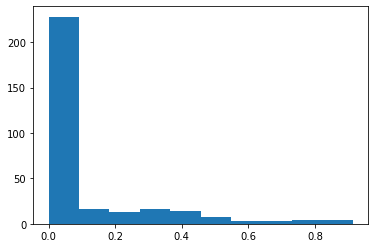

In [84]:
plt.hist(diffus[np.logical_and(r2s<.38,r2s>.36)])

In [15]:
a['ksn'] = a['ebe_mmkyr'].to_numpy()/dfs[4,5][:len(a)]
a.to_file('octo_327_data/')
plt.plot(a['ksn'],a['ebe_mmkyr'],'.')
plt.yscale('log')
plt.xscale('log')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [73]:
plt.plot(dfs[4,10],a['ebe_mmkyr'],'.')
plt.yscale('log')
plt.xscale('log')
plt.xlim([10e-11,10e-5])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

0.31561967388953904

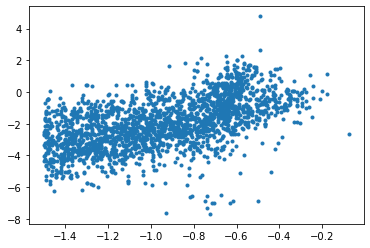

In [13]:
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(np.float64(a['slp_ave'][:n]/1000))
I0 = np.where(x<-1.5)[0]
xi = x.copy()
x = np.delete(x,I0)
y = np.delete(y,I0)
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
x = np.delete(x,I2)
y = np.delete(y,I2)
l  = lm.LinearRegression()
p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = p.predict(x.reshape(-1,1))
plt.plot(x,y,'.')
sklearn.metrics.r2_score(y.reshape(-1,1),y2)


ValueError: x and y must have same first dimension, but have shapes (19, 41) and (3553,)

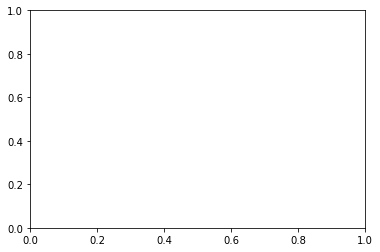

In [72]:
plt.plot(slps1,a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(np.float64(a['slps1']))
xi = x.copy()
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
x = np.delete(x,I2)
y = np.delete(y,I2)
l  = lm.LinearRegression()
p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = p.predict(x.reshape(-1,1))
sklearn.metrics.r2_score(y.reshape(-1,1),y2)

In [15]:
#ax=plt.plot(eros1[:len(a)],a['ebe_gcmyr']/1000,'.')
slps_ = slps1
slps_[slps_<1e-6] = np.nan
ax=plt.plot(eros1[len(a)],a['ebe_gcmyr'][/1000,'.')
plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-2, 1])
#plt.ylim([1e-2, 1])

#a['ebe_gcmyr'][a['erorate_est']<=0] = np.nan

SyntaxError: invalid syntax (<ipython-input-15-e6381bda8298>, line 4)

In [20]:
r2s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
from sklearn import linear_model as lm
ax=plt.plot(slps1[1:3500],np.float64(a['ebe_mmkyr'][1:3500])/1000,'.')
erate = np.float64(a['ebe_mmkyr'][1:n])/1000
slps1 = slps1[1:n]
I = np.where(slps1 ==0)
np.delete(slps1,I)
slps1 = erate = np.delete(erate,I)
I2 = np.where(np.isnan(erate))
slps1 = np.delete(slps1,I2)
erate = np.delete(erate,I2)
l  = lm.LinearRegression()
l.fit(slps1.reshape(-1,1),erate.reshape(-1,1))
plt.yscale('log')
plt.xscale('log')

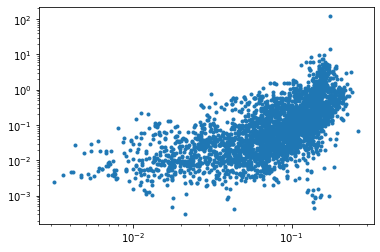

In [47]:
ax=plt.plot(np.float64(a['slp_ave'][1:3500]/3500),np.float64(a['ebe_mmkyr'][1:3500])/1000,'.')
plt.yscale('log')
plt.xscale('log')

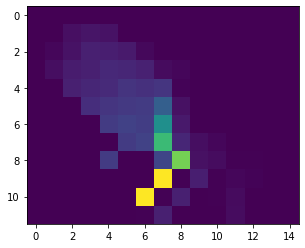

In [109]:
plt.imshow(f.A)

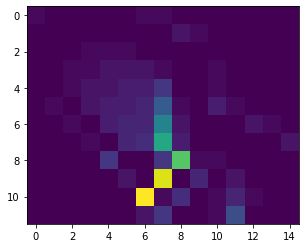

In [114]:
plt.imshow(A)

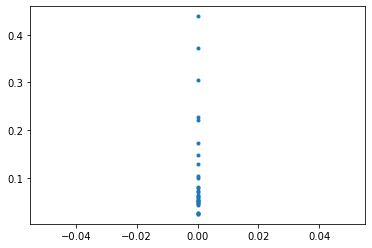

In [40]:
#ax=plt.plot(eros1[:len(a)],a['ebe_gcmyr']/1000,'.')
#ax=plt.plot(slps1[:len(a)],a['slp_ave'],'.')
ax=plt.plot(eros1[:30],np.float64(a['slp_ave'][:30])/1000,'.')

#plt.yscale('log')
#plt.xscale('log')
#plt.xlim([5e-4, 1])

In [119]:
np.argmax(np.abs(slps1[1:30] - np.float64(a['slp_ave'][1:30])))

28

NameError: name 'dfs' is not defined

In [ ]:
import seaborn as sns

In [ ]:
a.columns

Rearrange Section 3 so that it starts with the measurements and then describes how we analyzed them.  Expand it paragraph by paragraph as follows.

3.0.  Measurements of Q and C.  The second paragraph of what is now Section 3.1 is a good start.  Expand the text so that it includes more information about how the measurements were made and where the data are stored so that readers could find the data if they want to.  Paragraphs:
- TWRA measurement history and protocols
- Characteristics of Q and C data (gaps, frequency, etc.)
- We analyzed data from X rivers.  Explain why we chose those rivers.

3.1.  Rating curve background.  Paragraphs:
- What is a rating curve?  Show Equation 1.
- RCs are useful for improving estimates of Q_s
- We used MVUE to estimate a and b.  Explain why we chose this method.
- We centered log(Q) to avoid correlation of a and b
- We applied a correction for log retransformation bias.

3.2.  Rating curve application.  Paragraphs:
- We used the method in Section 3.1 to get daily C and Q_s.  Different rating curves each year.
- We calculated annual Q_s from daily Q_s.  Describe how we dealt with gaps.
- We calculated erosion rates from Q_s.
- How we dealt with nested basins.

3.3.  Landslide volumes generated by Morakot.  Paragraphs:
- We use landslide volumes reported in Marc et al. (2018)
- We calculated basin-total landslide volumes from that inventory.